<a href="https://colab.research.google.com/github/RenataKostolina/Machine_learning/blob/main/SVM_and_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

*Курсив*##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

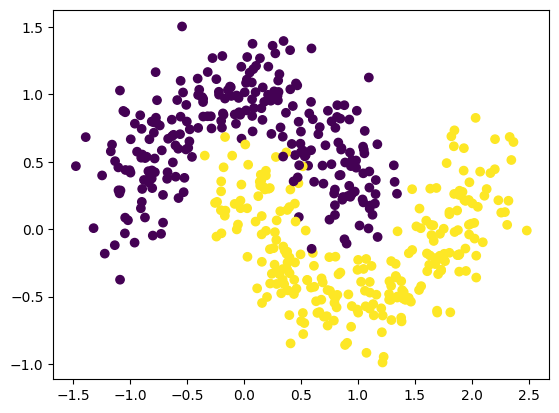

In [ ]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
scaling=StandardScaler()
scaling.fit(moons_points)
moons_scaled=scaling.transform(moons_points)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(moons_scaled, moons_labels, test_size=0.2, random_state=42)

In [ ]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression accuracy: %.4f" % accuracy)

Logistic Regression accuracy: 0.8600


<Axes: >

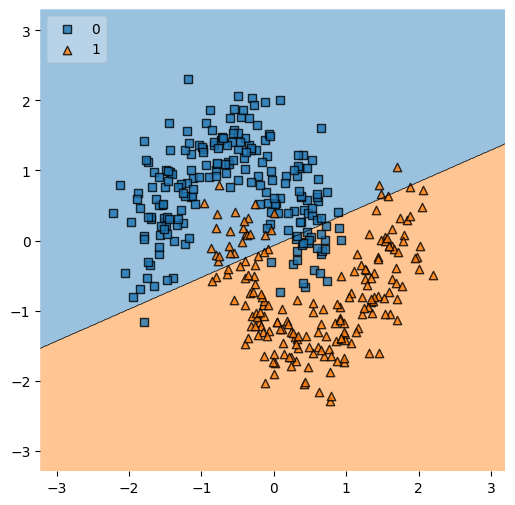

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_decision_regions(X_train, y_train, clf=lr, legend=2, ax=ax)

In [ ]:
svm = SVC(kernel='linear', random_state = 42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, svm_pred)
print("SVC accuracy: %.4f" % accuracy)

SVC accuracy: 0.8600


<Axes: >

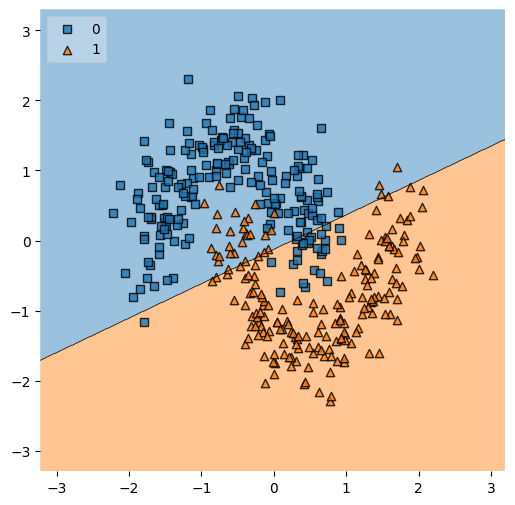

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_decision_regions(X_train, y_train, clf=svm, legend=2, ax=ax)

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [ ]:
svm = SVC(kernel='poly', C=10.0, degree=3, random_state = 42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, svm_pred)
print("SVC accuracy 'poly' with degree=3: %.4f" % accuracy)

SVC accuracy 'poly' with degree=3: 0.8700


<Axes: >

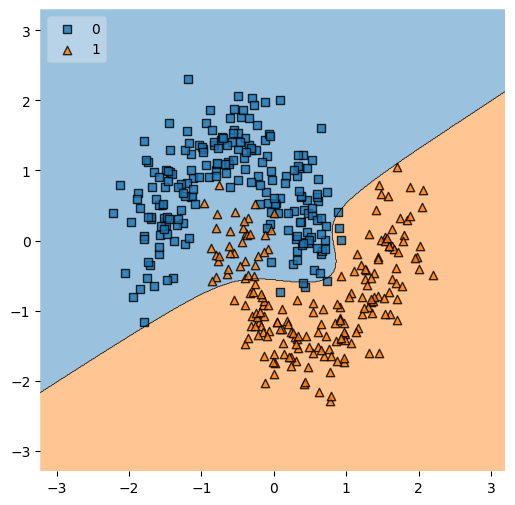

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_decision_regions(X_train, y_train, clf=svm, legend=2, ax=ax)

What have happenned with classification quality?
- При использовании kernel = 'poly', точность выросла относительно 'linear', однако очень незначительно.

How did decision border changed for each kernel?
- Граница принятия решений приобрела искривленность, описывающую один из классов.

What degree have you chosen and why?
- Экспериментально было получено, что нечетные степени дают лучшие результаты точность в данном случае, 1 степень является линейной, что мы и пробовали в предыдущем пункте, при степенях 5 и более точность падает, поэтому была выбрана 3 степень.

In [ ]:
svm = SVC(kernel='rbf', C=10.0, random_state = 42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, svm_pred)
print("SVC accuracy 'rbf': %.4f" % accuracy)

SVC accuracy 'rbf': 0.9700


<Axes: >

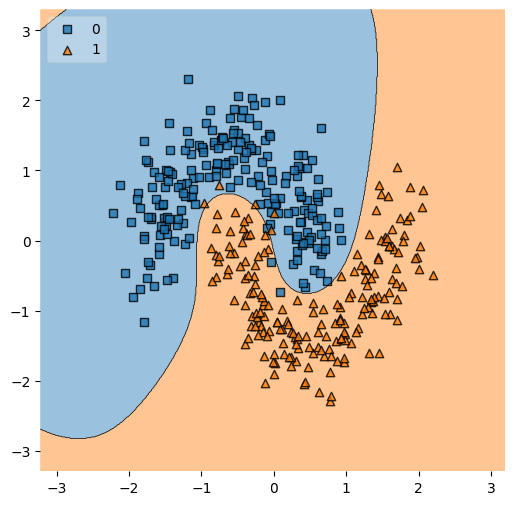

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_decision_regions(X_train, y_train, clf=svm, legend=2, ax=ax)

What have happenned with classification quality?
- При использовании kernel = 'rbf', точность значительно увеличилась.

How did decision border changed for each kernel?
- Граница принятия решений стала довольно искривленной, так как ядро rbf может комбинировать множество полиномиальных ядер разных степеней.

What degree have you chosen and why?
- Нет степени.

In [ ]:
svm = SVC(kernel='sigmoid', C=0.01, coef0=1.6, random_state = 42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, svm_pred)
print("SVC accuracy 'sigmoid': %.4f" % accuracy)

SVC accuracy 'sigmoid': 0.8600


<Axes: >

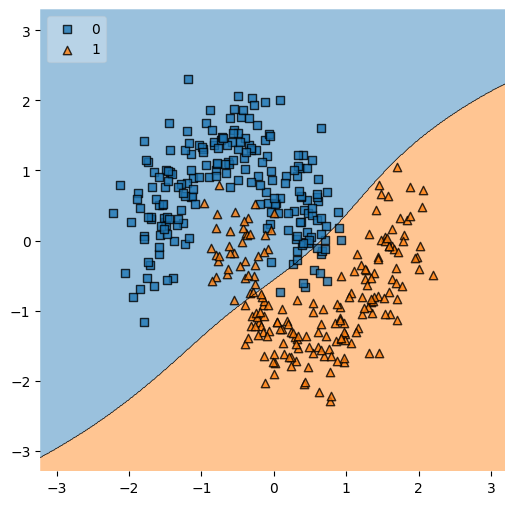

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_decision_regions(X_train, y_train, clf=svm, legend=2, ax=ax)

What have happenned with classification quality?
- При использовании kernel = 'sigmoid', точность была наименьшей.

How did decision border changed for each kernel?
- Граница принятия решений описывается почти прямой, что мы и видим при вычислении точности.

What degree have you chosen and why?
- Нет степени.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
lr_pipeline = Pipeline([("poly_features", PolynomialFeatures(3)), ("lr", LogisticRegression(random_state = 42))])
lr_pipeline.fit(X_train, y_train)
lr_pipeline_pred = lr_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, lr_pipeline_pred)
print("Logistic Regression accuracy with PolynomialFeatures(3): %.4f" % accuracy)

Logistic Regression accuracy with PolynomialFeatures(3): 0.9600


<Axes: >

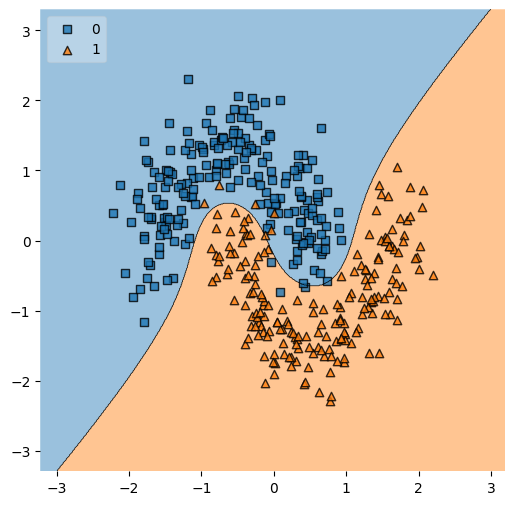

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_decision_regions(X_train, y_train, clf=lr_pipeline, legend=2, ax=ax)

В данном случае мы видим, что при такой же степени полиномов граница принятия решений гораздо лучше описывает данные, что соответствует росту точности предсказаний с 0.87 до 0.96.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

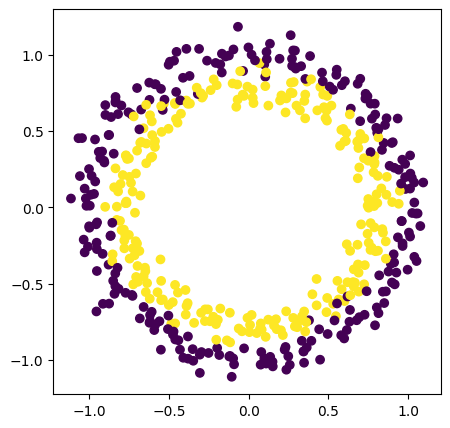

In [ ]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

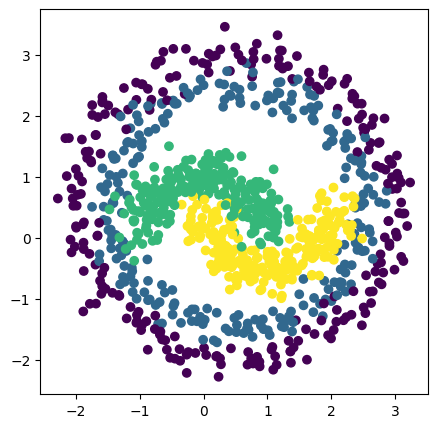

In [ ]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [ ]:
scaling=StandardScaler()
scaling.fit(points)
points_scaled=scaling.transform(points)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(points_scaled, labels, test_size=0.2, random_state=30)

In [ ]:
svm = SVC(kernel='sigmoid', random_state = 42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, svm_pred)
print("SVC accuracy 'sigmoid': %.4f" % accuracy)

SVC accuracy 'sigmoid': 0.3150


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

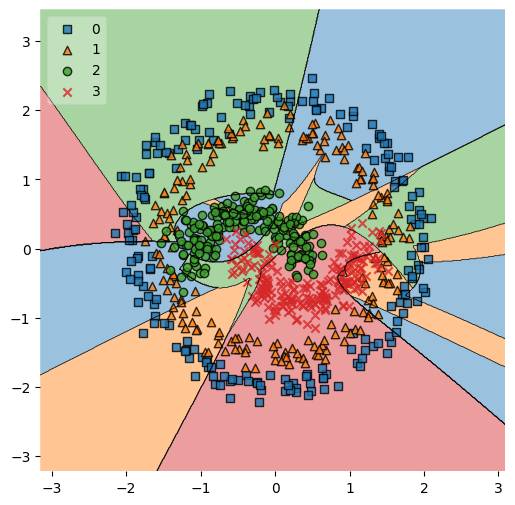

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_decision_regions(X_train, y_train, clf=svm, legend=2, ax=ax)

Как и ожидалось, ядро сигмоида показало низкую точность, поскольку данные не соответствуют распределению сигмоида.

In [ ]:
svm = SVC(kernel='poly', C=10.0, degree=2, random_state = 42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, svm_pred)
print("SVC accuracy 'poly' with degree=5: %.4f" % accuracy)

SVC accuracy 'poly' with degree=5: 0.7550


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

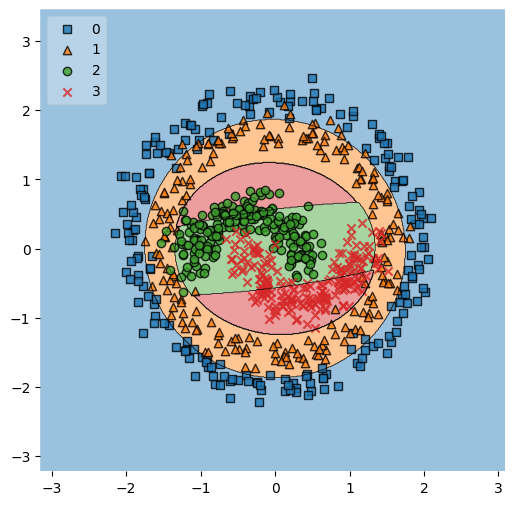

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_decision_regions(X_train, y_train, clf=svm, legend=2, ax=ax)

Полиномиальное ядро хорошо описывает окружности, то есть певерхности второго порядка, но плохо описывает комбинацию полумесяцев, что мы видиели и в предыдущих пунктах этого задания.

In [ ]:
lr_pipeline = Pipeline([("poly_features", PolynomialFeatures(3)), ("lr", LogisticRegression(random_state = 42))])
lr_pipeline.fit(X_train, y_train)
lr_pipeline_pred = lr_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, lr_pipeline_pred)
print("Logistic Regression accuracy with PolynomialFeatures(3): %.4f" % accuracy)

Logistic Regression accuracy with PolynomialFeatures(3): 0.9050


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

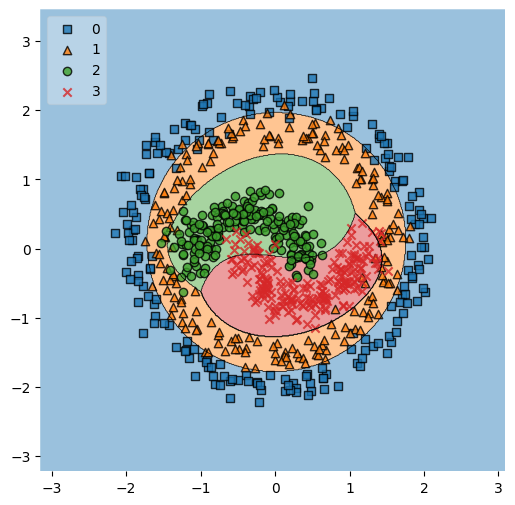

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_decision_regions(X_train, y_train, clf=lr_pipeline, legend=2, ax=ax)

Как и ранее, логистическая регрессия вместе с PolynomialFeatures показала хороший результат для распределения полумесяцев, однако данные распределены неравномерно, то есть на границах полумесяцев справа и слева присутствует пересечение с другими классами, в то время как сверху и снизу пустоты.

In [ ]:
svm = SVC(kernel='rbf', C=10.0, random_state = 42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, svm_pred)
print("SVC accuracy 'rbf': %.4f" % accuracy)

SVC accuracy 'rbf': 0.9150


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

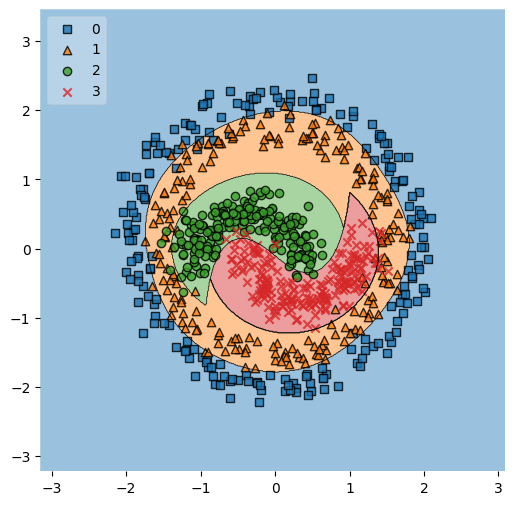

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_decision_regions(X_train, y_train, clf=svm, legend=2, ax=ax)

Так как это ядро использует преобразование данных в многомерное пространство, а затем определяет гиперплоскость для принятия решений, то она с хорошей точностью предстказывает результат.